In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.optimize as sp
import scipy.constants as const
plt.rcParams['figure.dpi'] = 150

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
Data_names = []
for (dir_path, dir_names, file_names) in os.walk('./Labday_2_measurements_2'):
    Data_names.extend(file_names)
    
Data_list = []
increasing_segments = []
Increasing_V2 = []
    

In [9]:
Increasing_V2 = []



for i, Data_name in enumerate(Data_names):
    Data = np.loadtxt('Labday_2_measurements_2/' + Data_name, skiprows=3)
    time = Data[:, 0]
    V1 = Data[:, 1]  # Assuming V1 is in the second column
    V2 = Data[:, 2]  # Assuming V2 is in the third column
    
    # Manually specified indices
    a = 5270  # Specify the start index
    b = 8909  # Specify the end index
    c = b-1500
    d = 11000 
    # Collect data between indices a and b
    time_segment = time[a:b+1]
    V1_segment = V1[a:b+1]
    V2_segment = V2[a:b+1]
    
    time_neg = time[c:d]
    V1_Neg_segment = V1[c:d]
    V2_Neg_segment = V2[c:d]
    
    
    # Check if this segment index matches any of the desired indices
    if i in [0, 3, 7, 21, 30, 33, 37, 51]:
        Increasing_V2.append((time_segment, V1_segment, V2_segment))



c_light = const.c
eps0 = const.epsilon_0
a = (1/4)*c_light*eps0
b = (2*np.pi)/(633e-9) 

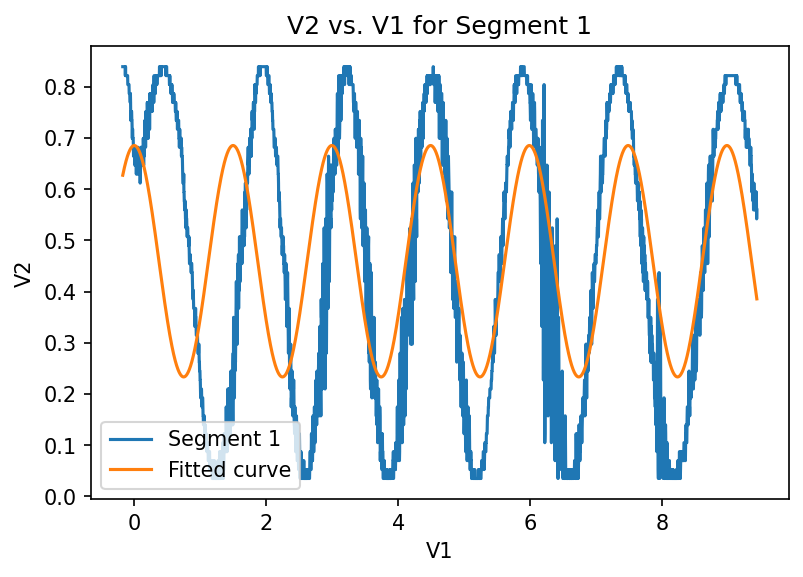

[2.25958842e-01 2.11394219e-07 4.59236903e-01]


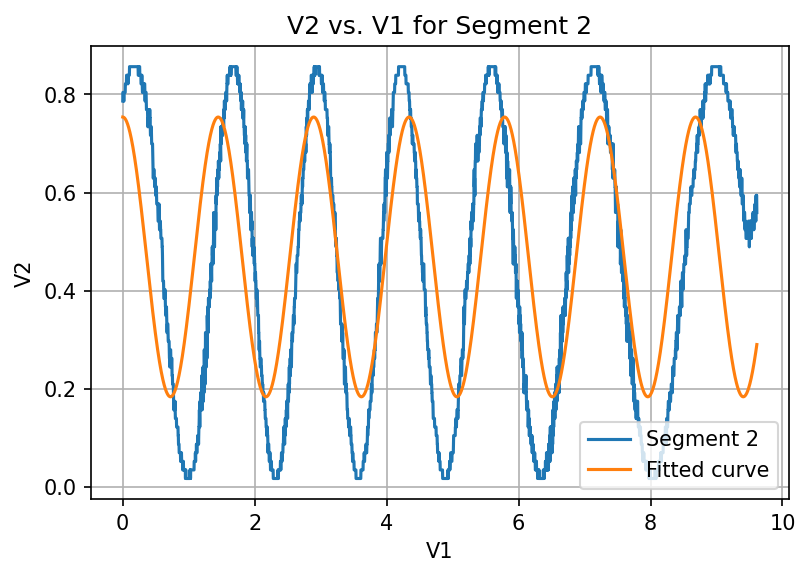

[2.85002881e-01 2.18729667e-07 4.68969852e-01]


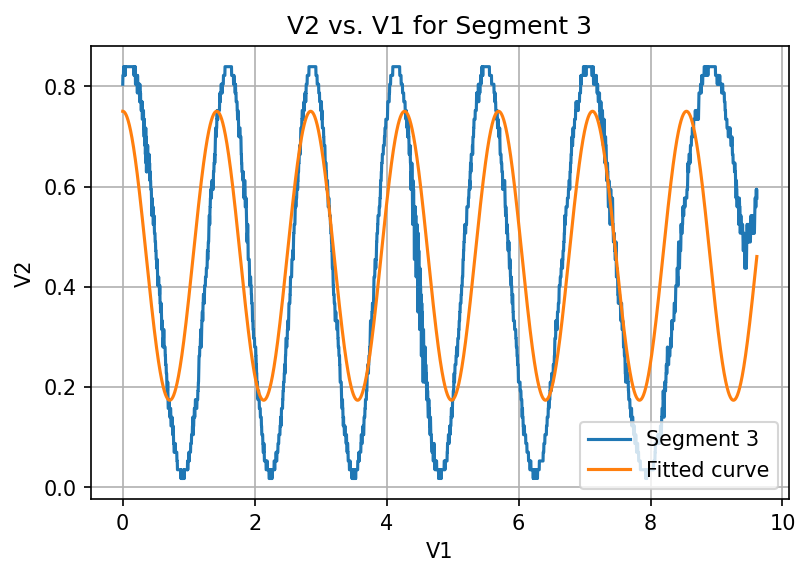

[2.88261705e-01 2.22251167e-07 4.61881213e-01]


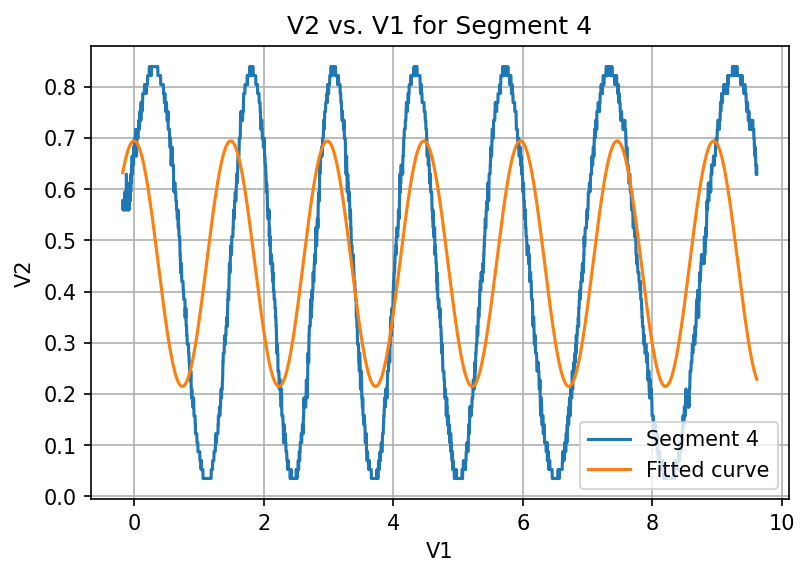

[2.39698884e-01 2.12249413e-07 4.54423686e-01]


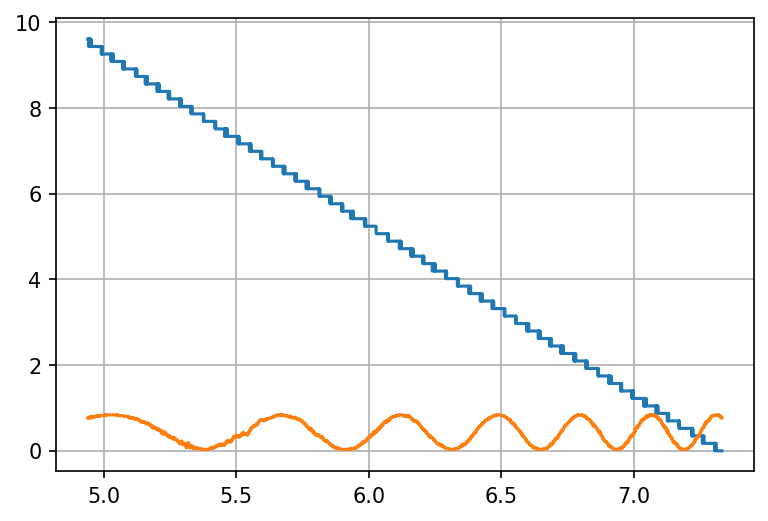

In [10]:
amplitude_guess = 1.2
k_guess = 21.5e-8
offset_guess = 0.4
p0 = [amplitude_guess, k_guess, offset_guess]

frequency = (2*np.pi)/(633e-9)
def Intensity_fit(v, *p): 
    amplitude = p[0]
    k = p[1]
    offset = p[2]
    return amplitude *(np.cos(frequency*2*k*v)) + offset

# Plot V2 vs. V1 and V1_segment vs. time_segment for each segment of increasing V2 on individual plots
for i, segment in enumerate(Increasing_V2):
    time_segment, V1_segment, V2_segment = segment
    
    V2_help = np.linspace(min(V2_segment), max(V2_segment), len(V1_segment))
    # Perform curve fitting
    popt, pcov = sp.curve_fit(Intensity_fit, V2_help, V1_segment, p0=p0)

    # Calculate the standard deviations of the fitted parameters
    #perr = np.sqrt(np.diag(pcov))
    
    # Plot V2 vs. V1
    plt.plot(V2_help, V1_segment,'-',label=f'Segment {i+1}')
    #plt.plot(V2_help, Intensity_fit(V2_help, *p0), label = 'guess')
    plt.plot(V2_help, Intensity_fit(V2_help, *popt),'-', label='Fitted curve')
    plt.xlabel('V1')
    plt.ylabel('V2')
    plt.title(f'V2 vs. V1 for Segment {i+1}')
    plt.legend()
    plt.show()
    plt.grid()
    print(popt)
    
plt.plot(time_neg, V2_Neg_segment)
plt.plot(time_neg, V1_Neg_segment)



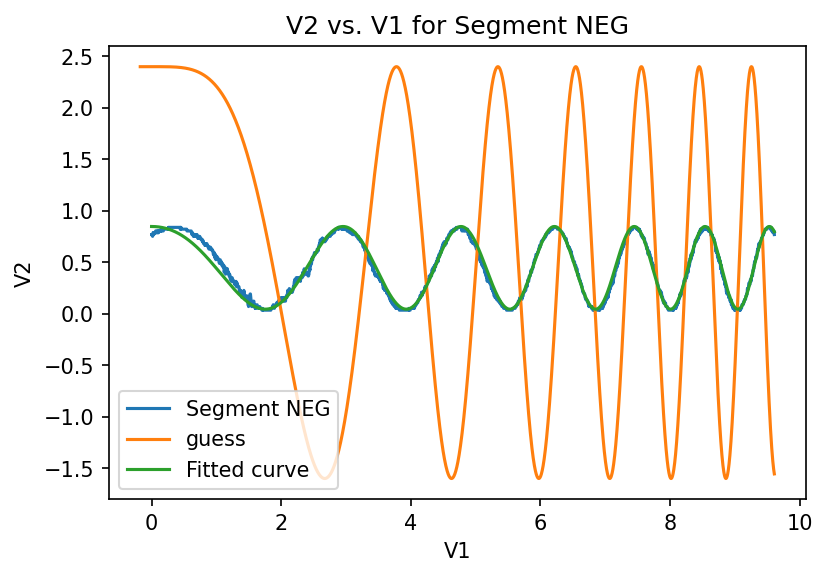

[4.01519548e-01 1.32692495e-08 4.46140088e-01 6.22732689e-08]


In [5]:
V2_Neg_help = np.linspace(min(V2_Neg_segment), max(V2_Neg_segment), len(V1_Neg_segment))
    # Perform curve fitting

amplitude_guess = 2
k_guess = 21e-9
offset_guess = 0.4
n_guess = 0
p0_NEG = [amplitude_guess, k_guess, offset_guess, n_guess]

frequency = (2*np.pi)/(600e-9)
def Intensity_Quad_fit(v, *p): 
    amplitude = p[0]
    k = p[1]
    offset = p[2]
    n = p[3]
    return amplitude *(np.cos(frequency*2*(k*v**2+n*v))) + offset

    # Calculate the standard deviations of the fitted parameters
    #perr = np.sqrt(np.diag(pcov))

popt_NEG, pcov_NEG = sp.curve_fit(Intensity_Quad_fit, V2_Neg_help, V1_Neg_segment, p0=p0_NEG)
    # Plot V2 vs. V1
plt.plot(V2_Neg_help, V1_Neg_segment,'-',label=f'Segment NEG')
plt.plot(V2_help, Intensity_Quad_fit(V2_help, *p0_NEG), label = 'guess')
plt.plot(V2_Neg_help, Intensity_Quad_fit(V2_Neg_help, *popt_NEG),'-', label='Fitted curve')
plt.xlabel('V1')
plt.ylabel('V2')
plt.title(f'V2 vs. V1 for Segment NEG')
plt.legend()
plt.show()
print(popt_NEG)